In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#import matplotlib as mpl
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

from scipy import stats
from statistics import mode

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install xlrd


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_csv("arrests.csv")

In [4]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,32311380,06/18/2007,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,Q,27,1.0,18-24,M,BLACK,NaN,NaN,NaN,NaN,NaN
1,192799737,01/26/2019,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,M,25,0.0,45-64,M,BLACK,1000555.0,230994.0,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045)
2,193260691,02/06/2019,NaN,NaN,NaN,NaN,PL 2203400,F,M,14,0.0,25-44,M,UNKNOWN,986685.0,215375.0,40.757839,-73.991212,POINT (-73.99121211099998 40.75783900300007)
3,149117452,01/06/2016,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,67,0.0,25-44,M,BLACK,998032.0,175598.0,40.648650,-73.950336,POINT (-73.95033556299995 40.648650085000035)
4,190049060,11/15/2018,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0.0,25-44,M,BLACK,1003606.0,185050.0,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5308876 entries, 0 to 5308875
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ARREST_KEY         int64  
 1   ARREST_DATE        object 
 2   PD_CD              float64
 3   PD_DESC            object 
 4   KY_CD              float64
 5   OFNS_DESC          object 
 6   LAW_CODE           object 
 7   LAW_CAT_CD         object 
 8   ARREST_BORO        object 
 9   ARREST_PRECINCT    int64  
 10  JURISDICTION_CODE  float64
 11  AGE_GROUP          object 
 12  PERP_SEX           object 
 13  PERP_RACE          object 
 14  X_COORD_CD         float64
 15  Y_COORD_CD         float64
 16  Latitude           float64
 17  Longitude          float64
 18  Lon_Lat            object 
dtypes: float64(7), int64(2), object(10)
memory usage: 769.6+ MB


In [6]:
df.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,5.308876e+06,5.308563e+06,5.299707e+06,5.308876e+06,5.308866e+06,5.308875e+06,5.308875e+06,5.308875e+06,5.308875e+06
mean,1.028799e+08,5.058053e+02,2.983706e+02,6.076179e+01,1.295535e+00,1.005355e+06,2.145870e+05,4.075546e+01,-7.392378e+01
std,5.857573e+07,2.650585e+02,1.805997e+02,3.435206e+01,9.416378e+00,2.008741e+04,1.603760e+05,4.335468e-01,7.249432e-02
min,9.926901e+06,0.000000e+00,1.010000e+02,1.000000e+00,0.000000e+00,9.133570e+05,1.211310e+05,4.049891e+01,-7.425494e+01
25%,6.143663e+07,2.690000e+02,1.260000e+02,3.300000e+01,0.000000e+00,9.932800e+05,1.868570e+05,4.067952e+01,-7.396743e+01
50%,8.567103e+07,5.110000e+02,3.410000e+02,6.000000e+01,0.000000e+00,1.004892e+06,2.092850e+05,4.074108e+01,-7.392548e+01
75%,1.500900e+08,7.480000e+02,3.480000e+02,8.400000e+01,0.000000e+00,1.015924e+06,2.366140e+05,4.081609e+01,-7.388556e+01
max,2.385139e+08,9.970000e+02,9.950000e+02,1.230000e+02,9.700000e+01,1.067302e+06,8.202360e+06,6.208307e+01,-7.368178e+01


In [7]:
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])

In [8]:
df.isna().sum()

ARREST_KEY               0
ARREST_DATE              0
PD_CD                  313
PD_DESC               9169
KY_CD                 9169
OFNS_DESC             9169
LAW_CODE               196
LAW_CAT_CD           20254
ARREST_BORO              8
ARREST_PRECINCT          0
JURISDICTION_CODE       10
AGE_GROUP               17
PERP_SEX                 0
PERP_RACE                0
X_COORD_CD               1
Y_COORD_CD               1
Latitude                 1
Longitude                1
Lon_Lat                  1
dtype: int64

In [9]:
df.shape

(5308876, 19)

In [10]:
df = df.dropna() # ya fue no perdemos nada de informacion

### Parece haber una tendencia a la baja

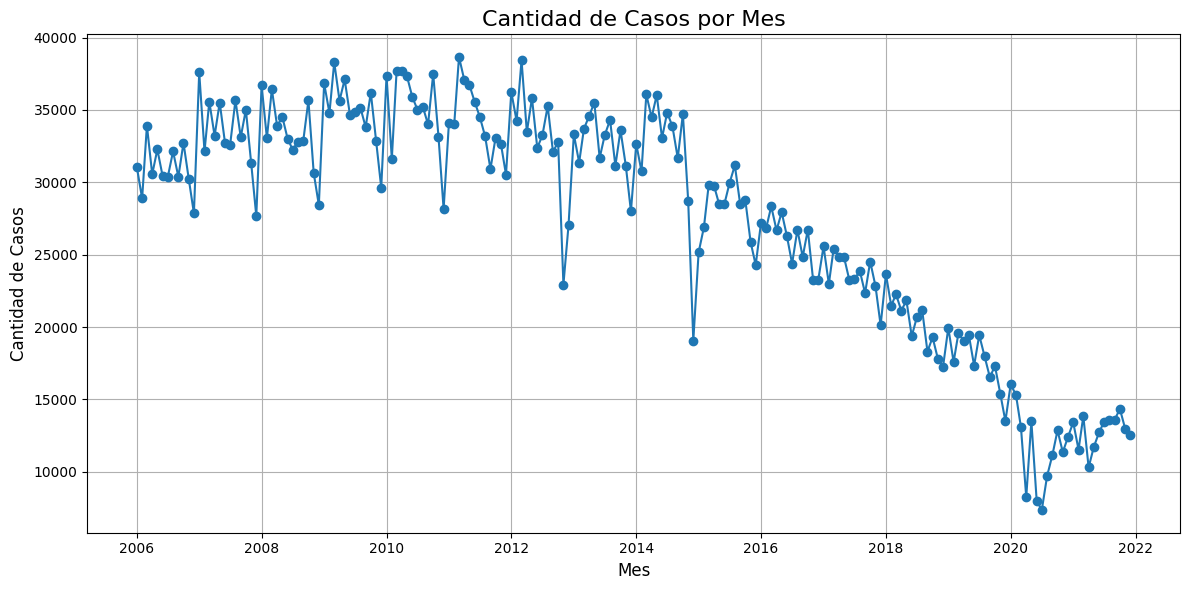

In [11]:
df_mes = df.groupby(df['ARREST_DATE'].dt.to_period('M')).size().reset_index(name='CASE_COUNT')

# Convierte la columna de periodos a datetime para ordenar correctamente
df_mes['ARREST_DATE'] = df_mes['ARREST_DATE'].dt.to_timestamp()

# Visualiza los datos en un gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_mes['ARREST_DATE'], df_mes['CASE_COUNT'], marker='o', linestyle='-')
plt.title('Cantidad de Casos por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de Casos', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
df_mes = df_mes.set_index('ARREST_DATE')
y = df_mes['CASE_COUNT'].resample('M').mean()

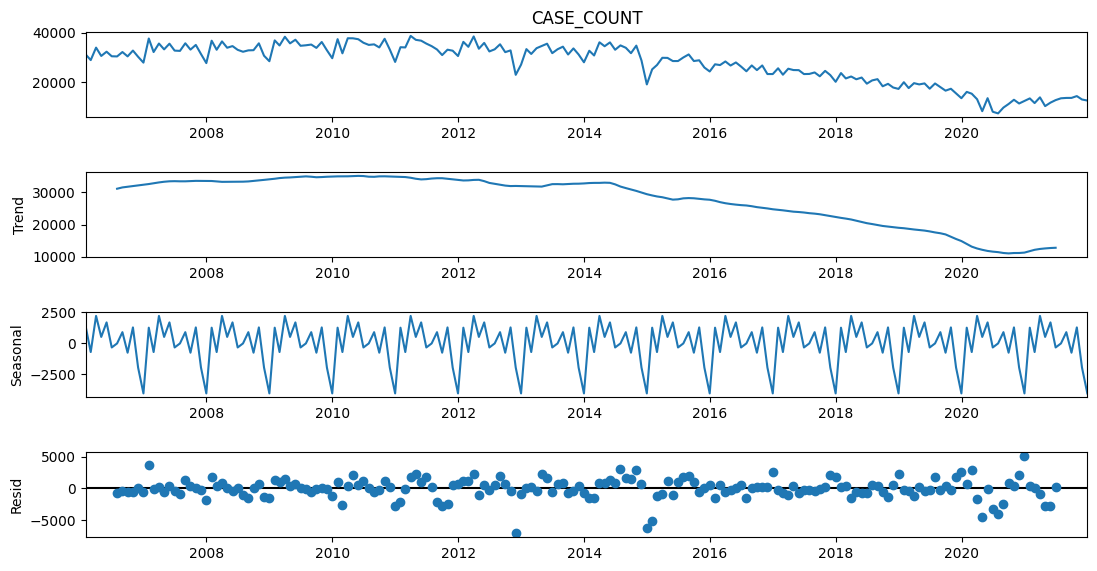

In [13]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
fig.set_size_inches(12, 6)

#### Como hay una tendencia negativa, quizas es util usar la descomposicion multiplicativa. Pero, la variacion estacional parece mantenerse constante asi que nose

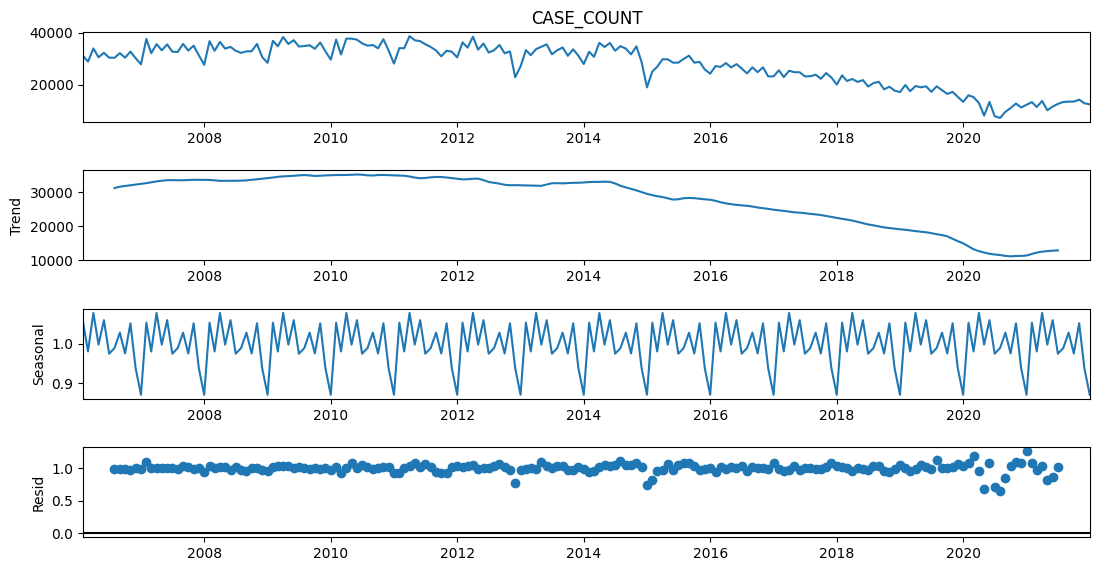

In [14]:
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
fig = decomposition.plot()
fig.set_size_inches(12, 6)

### Random Walk

In [15]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_mes, test_size=0.2, shuffle=False, random_state=42)

In [16]:
df_train.tail()

,CASE_COUNT
ARREST_DATE,
2018-05-01,21834
2018-06-01,19362
2018-07-01,20676
2018-08-01,21177
2018-09-01,18305


In [17]:
df_train['CASE_COUNT_SHIFT1'] = df_train.CASE_COUNT.shift()

df_train['CASE_COUNT_SHIFT1'].fillna(method='bfill', inplace=True)
df_train.head()

,CASE_COUNT,CASE_COUNT_SHIFT1
ARREST_DATE,,
2006-01-01,31055,31055.0
2006-02-01,28880,31055.0
2006-03-01,33918,28880.0
2006-04-01,30550,33918.0
2006-05-01,32269,30550.0


<Axes: xlabel='ARREST_DATE'>

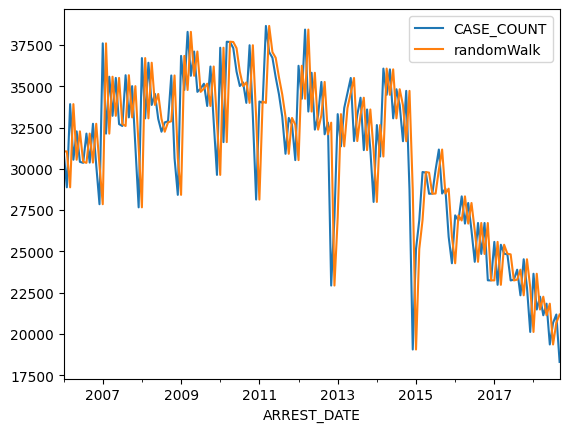

In [18]:
df_train['randomWalk'] = df_train.CASE_COUNT_SHIFT1
df_train.plot(kind='line', y=['CASE_COUNT', 'randomWalk'])

<Axes: xlabel='ARREST_DATE'>

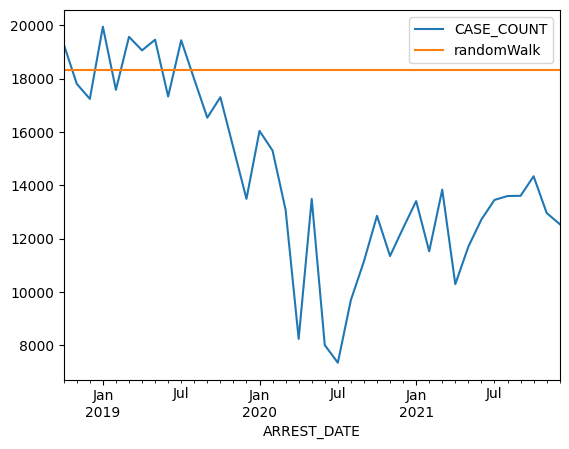

In [19]:
df_test['randomWalk'] = pd.Series(df_train['CASE_COUNT'][-1], index=df_test.index)
df_test.plot(kind='line', y=['CASE_COUNT', 'randomWalk'])

In [20]:
def RMSE(predicted, actual):
    mse = (predicted - actual) ** 2
    rmse = np.sqrt(mse.sum() / mse.count())
    return rmse

In [21]:
df_results = pd.DataFrame(columns = ["Model", "RMSE"])
df_results.loc[0, "Model"] = "Random Walk"
df_results.loc[0, "RMSE"] = RMSE(df_test.randomWalk, df_test.CASE_COUNT)
df_results

,Model,RMSE
0,Random Walk,5190.54509


In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 153 entries, 2006-01-01 to 2018-09-01
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CASE_COUNT         153 non-null    int64  
 1   CASE_COUNT_SHIFT1  153 non-null    float64
 2   randomWalk         153 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


In [27]:
model_mean_pred = df_train['CASE_COUNT'].mean()
model_mean_pred

30844.41176470588

In [28]:
df_train_mc = df_train.copy()
df_train_mc['Mean'] = model_mean_pred

df_test_mc = df_test.copy()
df_test_mc['Mean'] = model_mean_pred

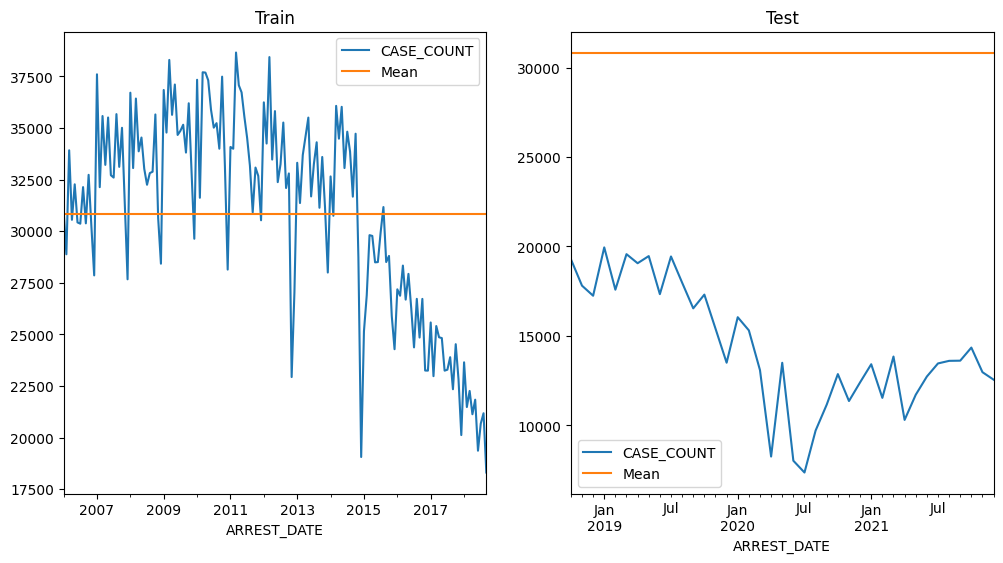

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
df_train_mc.plot(ax=axes[0], y = ["CASE_COUNT","Mean"],title='Train')
df_test_mc.plot(ax=axes[1],y = ["CASE_COUNT","Mean"], title='Test')
plt.show()

In [30]:
model_rmse = RMSE(df_test_mc.Mean, df_test_mc.CASE_COUNT)

In [31]:
df_results.loc[1, "Model"] = "Mean"
df_results.loc[1, "RMSE"] = model_rmse
df_results.head()

,Model,RMSE
0,Random Walk,5190.54509
1,Mean,16818.707462


## Tendencial Lineal

In [35]:
df_mes['timeIndex'] = pd.Series(np.arange(len(df_mes['CASE_COUNT'])), index=df_mes.index)
df_mes.timeIndex.head()

ARREST_DATE
2006-01-01    0
2006-02-01    1
2006-03-01    2
2006-04-01    3
2006-05-01    4
Name: timeIndex, dtype: int32

In [36]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_mes, test_size=0.2, shuffle=False, random_state=42)

In [37]:
import statsmodels.formula.api as smf
model_linear = smf.ols(formula='CASE_COUNT ~ timeIndex', data=df_train).fit()

In [38]:
df_train['LinearTrend'] = model_linear.predict(df_train.timeIndex)
df_test['LinearTrend'] = model_linear.predict(df_test.timeIndex)

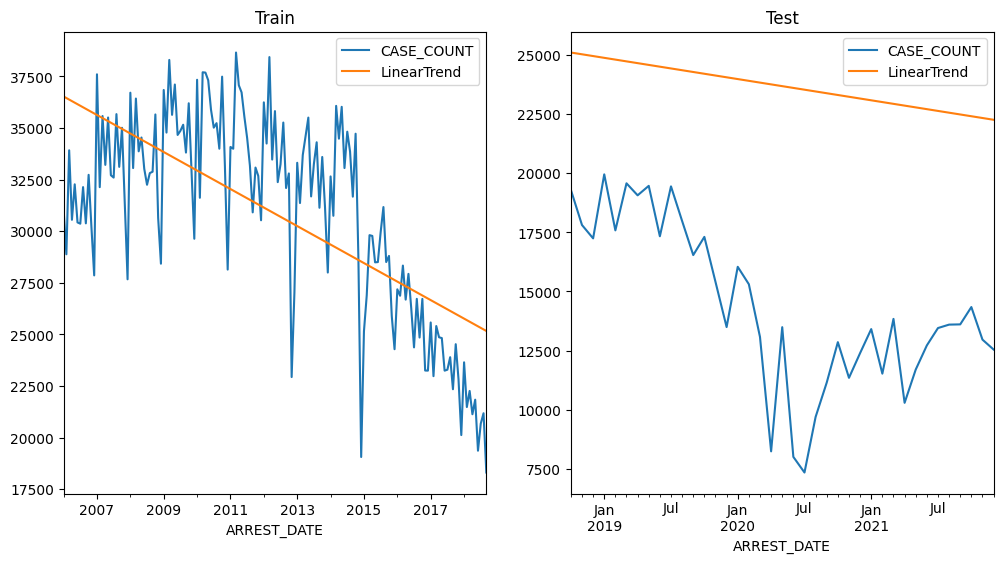

In [39]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
df_train.plot(kind="line", y = ["CASE_COUNT", "LinearTrend"], ax=axes[0], title='Train')
df_test.plot(kind="line", y = ["CASE_COUNT", "LinearTrend"], ax=axes[1], title='Test')
plt.show()

In [40]:
model_rmse = RMSE(df_test.LinearTrend, df_test.CASE_COUNT)

In [41]:
df_results.loc[2, "Model"] = "Linear Trend"
df_results.loc[2, "RMSE"] = model_rmse
df_results.head()

,Model,RMSE
0,Random Walk,5190.54509
1,Mean,16818.707462
2,Linear Trend,9734.708401


In [42]:
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CASE_COUNT   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     126.7
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           1.01e-21
Time:                        11:41:53   Log-Likelihood:                -1470.1
No. Observations:                 153   AIC:                             2944.
Df Residuals:                     151   BIC:                             2950.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.652e+04    583.697     62.575      0.000    3.54e+04    3.77e+04
timeIndex    -74.7393      6.640    -11.255      0.000     -87.859     -61.619
==============================================================================
Omnibus:                        4.944   Durbin-Watson:                   0.785
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                3.224
Skew:                          -0.180   Prob(JB):                        0.199
Kurtosis:                       2.386   Cond. No.                         175.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Tendencia Cuadratica

In [43]:
df_mes['timeIndex_sq'] = df_mes['timeIndex'] ** 2
df_mes.timeIndex_sq.head()

ARREST_DATE
2006-01-01     0
2006-02-01     1
2006-03-01     4
2006-04-01     9
2006-05-01    16
Name: timeIndex_sq, dtype: int32

In [44]:
df_train, df_test = train_test_split(df_mes, test_size=0.2, shuffle=False, random_state=42)
model_quadratic = smf.ols(formula='CASE_COUNT ~ timeIndex + timeIndex_sq', data=df_train).fit()
df_train['QuadraticTrend'] = model_quadratic.predict(df_train[['timeIndex', 'timeIndex_sq']])
df_test['QuadraticTrend'] = model_quadratic.predict(df_test[['timeIndex', 'timeIndex_sq']])

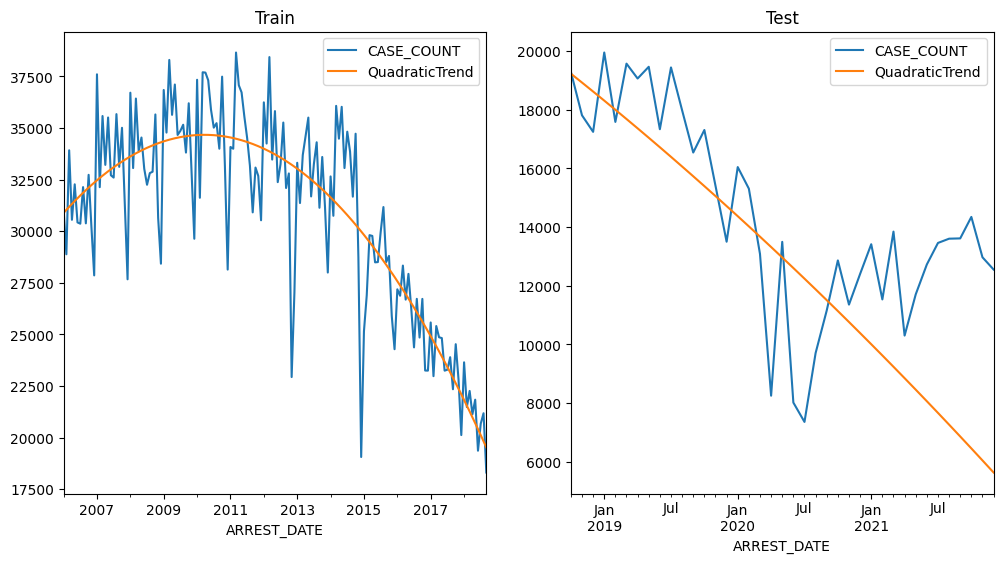

In [45]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
df_train.plot(kind="line", y = ["CASE_COUNT", "QuadraticTrend"], ax=axes[0], title='Train')
df_test.plot(kind="line", y = ["CASE_COUNT", "QuadraticTrend"], ax=axes[1], title='Test')
plt.show()

In [46]:
model_rmse = RMSE(df_test.QuadraticTrend, df_test.CASE_COUNT)

In [47]:
df_results.loc[3, "Model"] = "Quadratic Trend"
df_results.loc[3, "RMSE"] = model_rmse
df_results.head()

,Model,RMSE
0,Random Walk,5190.54509
1,Mean,16818.707462
2,Linear Trend,9734.708401
3,Quadratic Trend,3485.372846


In [48]:
model_quadratic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CASE_COUNT   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     206.1
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           9.24e-44
Time:                        11:44:53   Log-Likelihood:                -1415.7
No. Observations:                 153   AIC:                             2837.
Df Residuals:                     150   BIC:                             2846.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.089e+04    610.358     50.602      0.000    2.97e+04    3.21e+04
timeIndex      149.3485     18.555      8.049      0.000     112.686     186.011
timeIndex_sq    -1.4743      0.118    -12.478      0.000      -1.708      -1.241
==============================================================================
Omnibus:                       40.874   Durbin-Watson:                   1.597
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.128
Skew:                          -1.118   Prob(JB):                     1.34e-21
Kurtosis:                       6.175   Cond. No.                     3.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Tendencia con Tranformacion Logaritmica

In [50]:
df_train['log_ventas'] = np.log(df_train.CASE_COUNT)
df_test['log_ventas'] = np.log(df_test.CASE_COUNT)

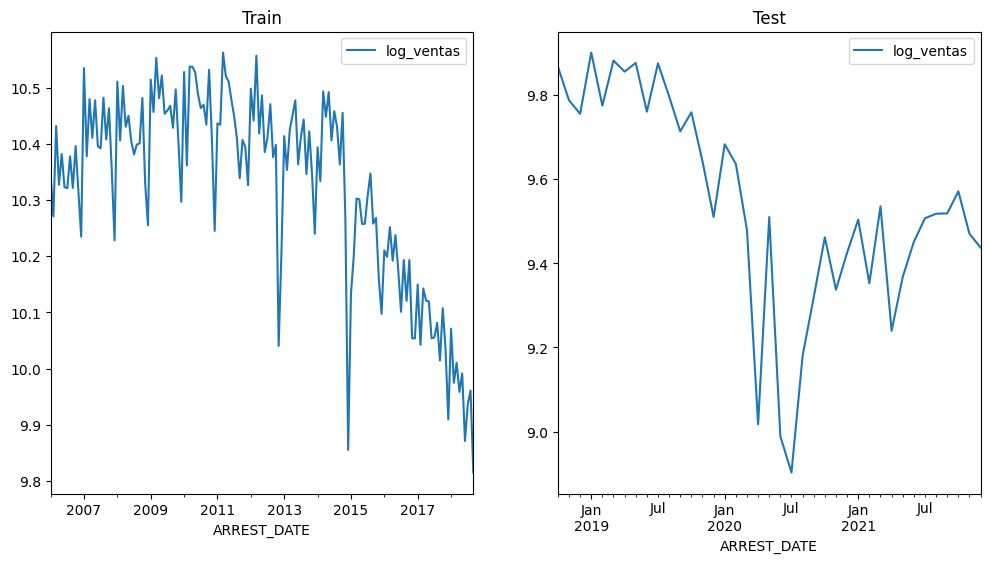

In [52]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
df_train.plot(kind="line", y = ["log_ventas"], ax=axes[0], title='Train')
df_test.plot(kind="line", y = ["log_ventas"], ax=axes[1], title='Test')
plt.show()

In [53]:
model_log = smf.ols(formula='log_ventas ~ timeIndex', data=df_train).fit()
df_train['LogTrend'] = model_log.predict(df_train[['timeIndex']])
df_test['LogTrend'] = model_log.predict(df_test[['timeIndex']])
df_train['back_LogTrend'] = np.exp(df_train['LogTrend'])
df_test['back_LogTrend'] = np.exp(df_test['LogTrend'])

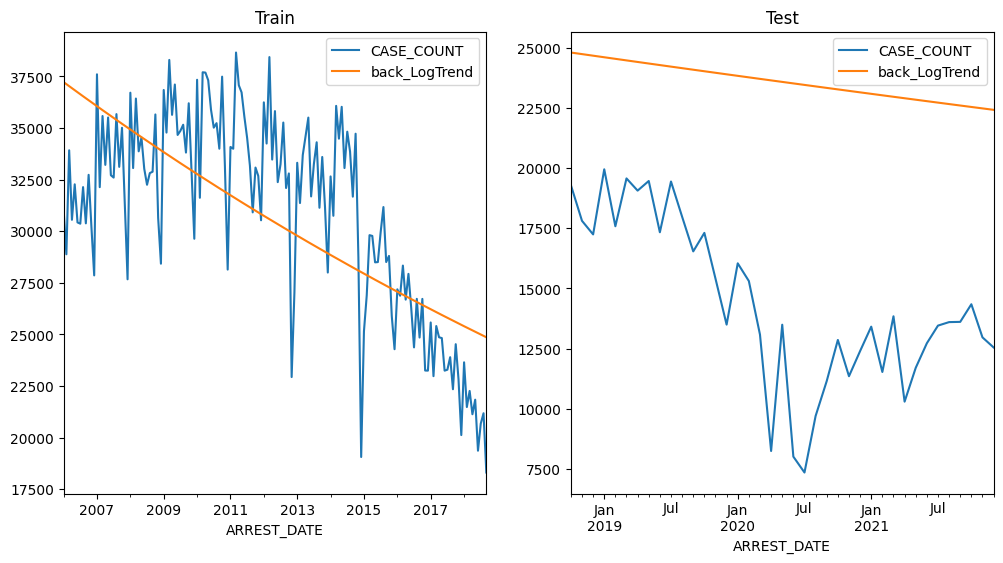

In [54]:
fig, axes = plt.subplots(1,2, figsize=(12,6))  
df_train.plot(kind="line", y = ["CASE_COUNT", "back_LogTrend"], ax=axes[0], title='Train')
df_test.plot(kind="line", y = ["CASE_COUNT", "back_LogTrend"], ax=axes[1], title='Test')
plt.show()

In [ ]:
model_rmse = RMSE(df_test.back_LogTrend, df_test.CASE_COUNT)
df_results.loc[4, "Model"] = "back_LogTrend"
df_results.loc[4, "RMSE"] = model_rmse
df_results.head()

,Model,RMSE
0,Random Walk,5190.54509
1,Mean,16818.707462
2,Linear Trend,9734.708401
3,Quadratic Trend,3485.372846
4,Log Trend,9673.804319


In [56]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_ventas   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     133.5
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           1.59e-22
Time:                        11:59:49   Log-Likelihood:                 101.39
No. Observations:                 153   AIC:                            -198.8
Df Residuals:                     151   BIC:                            -192.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5246      0.020    520.980      0.000      10.485      10.565
timeIndex     -0.0027      0.000    -11.555      0.000      -0.003      -0.002
==============================================================================
Omnibus:                        4.891   Durbin-Watson:                   0.730
Prob(Omnibus):                  0.087   Jarque-Bera (JB):                4.941
Skew:                          -0.411   Prob(JB):                       0.0845
Kurtosis:                       2.685   Cond. No.                         175.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Transformacion logaritmioca + Estacionalidad Mensual

In [58]:
df_train['month'] = [d.strftime('%b') for d in df_train.index]
df_test['month'] = [d.strftime('%b') for d in df_test.index]

In [62]:
dummies_mes_train = pd.get_dummies(df_train.month)
dummies_mes_test = pd.get_dummies(df_test.month)

In [63]:
df_train = df_train.join(dummies_mes_train)
df_test = df_test.join(dummies_mes_test)
df_train.head()

,CASE_COUNT,timeIndex,timeIndex_sq,QuadraticTrend,log_ventas,LogTrend,back_LogTrend,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
ARREST_DATE,,,,,,,,,,,,,,,,,,,,
2006-01-01,31055,0,0,30885.056088,10.343515,10.524641,37221.467522,Jan,False,False,False,False,True,False,False,False,False,False,False,False
2006-02-01,28880,1,1,31032.930310,10.270905,10.521985,37122.757095,Feb,False,False,False,True,False,False,False,False,False,False,False,False
2006-03-01,33918,2,4,31177.856008,10.431701,10.519330,37024.308445,Mar,False,False,False,False,False,False,False,True,False,False,False,False
2006-04-01,30550,3,9,31319.833183,10.327120,10.516674,36926.120879,Apr,True,False,False,False,False,False,False,False,False,False,False,False
2006-05-01,32269,4,16,31458.861834,10.381862,10.514019,36828.193704,May,False,False,False,False,False,False,False,False,True,False,False,False


### prediction

In [66]:
model_log_est = smf.ols(formula='log_ventas ~ timeIndex + Apr + Aug + Dec + Feb + Jan + Jul + Jun + Mar + May + Nov + Oct + Sep', data=df_train).fit()
df_train['model_log_est'] = model_log_est.predict(df_train[['timeIndex', "Apr","Aug", "Dec", "Feb", "Jan",\
                                               "Jul", "Jun", "Mar", "May","Nov", "Oct", "Sep"]])
df_test['model_log_est'] = model_log_est.predict(df_test[['timeIndex', "Apr","Aug", "Dec", "Feb", "Jan",\
                                               "Jul", "Jun", "Mar", "May","Nov", "Oct", "Sep"]])

In [67]:
df_test

,CASE_COUNT,timeIndex,timeIndex_sq,QuadraticTrend,log_ventas,LogTrend,back_LogTrend,month,Apr,Aug,...,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,model_log_est
ARREST_DATE,,,,,,,,,,,,,,,,,,,,,
2018-10-01,19289,153,23409,19224.380918,9.867290,10.118350,24793.819811,Oct,False,False,...,False,False,False,False,False,False,False,True,False,10.179361
2018-11-01,17805,154,23716,18921.131046,9.787235,10.115694,24728.067203,Nov,False,False,...,False,False,False,False,False,False,True,False,False,10.053126
2018-12-01,17241,155,24025,18614.932651,9.755046,10.113039,24662.488970,Dec,False,False,...,False,False,False,False,False,False,False,False,False,9.956564
2019-01-01,19945,156,24336,18305.785732,9.900734,10.110383,24597.084648,Jan,False,False,...,False,True,False,False,False,False,False,False,False,10.142847
2019-02-01,17579,157,24649,17993.690290,9.774460,10.107728,24531.853778,Feb,False,False,...,True,False,False,False,False,False,False,False,False,10.074684
2019-03-01,19566,158,24964,17678.646325,9.881549,10.105072,24466.795898,Mar,False,False,...,False,False,False,False,True,False,False,False,False,10.182321
2019-04-01,19059,159,25281,17360.653836,9.855295,10.102417,24401.910549,Apr,True,False,...,False,False,False,False,False,False,False,False,False,10.132159
2019-05-01,19459,160,25600,17039.712823,9.876065,10.099761,24337.197276,May,False,False,...,False,False,False,False,False,True,False,False,False,10.157739
2019-06-01,17330,161,25921,16715.823287,9.760194,10.097106,24272.655620,Jun,False,False,...,False,False,False,True,False,False,False,False,False,10.090576


In [68]:
df_train['back_LogEstTrend'] = np.exp(df_train['model_log_est'])
df_test['back_LogEstTrend'] = np.exp(df_test['model_log_est'])

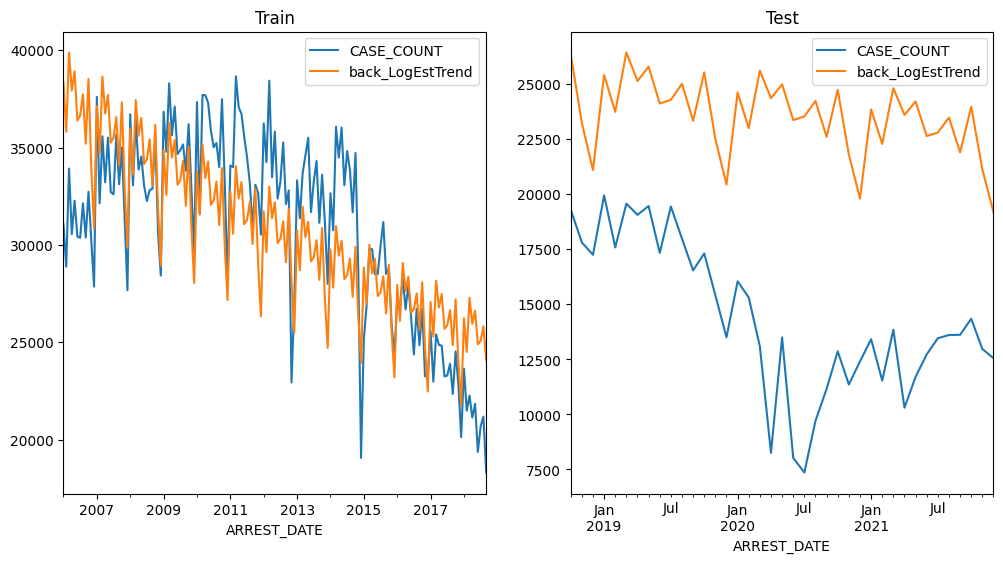

In [69]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
df_train.plot(kind="line", y = ["CASE_COUNT", "back_LogEstTrend"], ax=axes[0], title='Train')
df_test.plot(kind="line", y = ["CASE_COUNT", "back_LogEstTrend"], ax=axes[1], title='Test')
plt.show()

In [71]:
model_rmse = RMSE(df_test.back_LogEstTrend, df_test.CASE_COUNT)
df_results.loc[5, "Model"] = "back_LogEstTrend"
df_results.loc[5, "RMSE"] = model_rmse
df_results

,Model,RMSE
0,Random Walk,5190.54509
1,Mean,16818.707462
2,Linear Trend,9734.708401
3,Quadratic Trend,3485.372846
4,Log Trend,9673.804319
5,back_LogEstTrend,9709.719358


## Media Movil

In [72]:
df_mes['sma_5'] = df_mes.CASE_COUNT.rolling(5, min_periods=1).mean()
df_mes['sma_15'] = df_mes.CASE_COUNT.rolling(15, min_periods=1).mean()

<Axes: title={'center': 'SMA'}, xlabel='ARREST_DATE'>

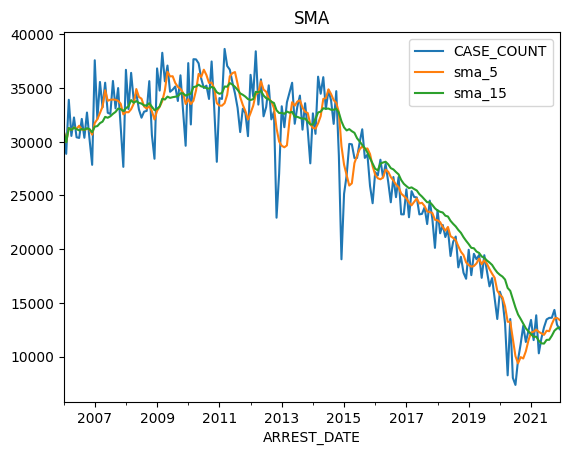

In [73]:
df_mes.plot(kind="line", y = ["CASE_COUNT", "sma_5", "sma_15"], title='SMA')

## Single Exponential Smoothing

In [74]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model_exp_smoothing_0 = SimpleExpSmoothing(df_train.CASE_COUNT).fit(smoothing_level=0, optimized=False)
model_exp_smoothing_03 = SimpleExpSmoothing(df_train.CASE_COUNT).fit(smoothing_level=0.3, optimized=False)
model_exp_smoothing_1 = SimpleExpSmoothing(df_train.CASE_COUNT).fit(smoothing_level=1, optimized=False)


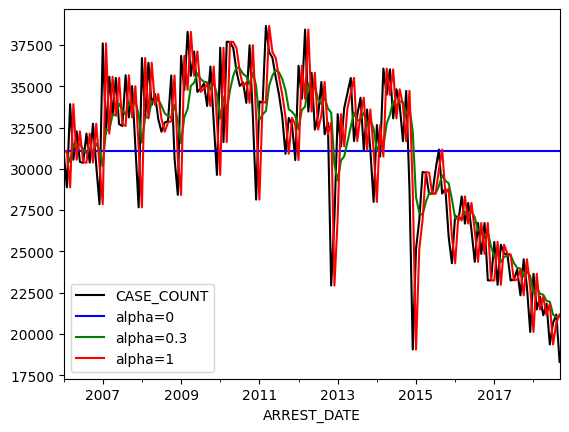

In [75]:
df_train.plot(kind= 'line', y = "CASE_COUNT", color='black')
model_exp_smoothing_0.fittedvalues.plot(label="alpha=0", color='b')
model_exp_smoothing_03.fittedvalues.plot(label="alpha=0.3", color='g')
model_exp_smoothing_1.fittedvalues.plot(label="alpha=1", color='r')
plt.legend()

In [76]:
df_test['simple_smoothing_0'] = model_exp_smoothing_0.forecast(len(df_test))
df_test['simple_smoothing_03'] = model_exp_smoothing_03.forecast(len(df_test))
df_test['simple_smoothing_1'] = model_exp_smoothing_1.forecast(len(df_test))

In [77]:
model_rmse_0 = RMSE(df_test.simple_smoothing_0, df_test.CASE_COUNT)
model_rmse_03 = RMSE(df_test.simple_smoothing_03, df_test.CASE_COUNT)
model_rmse_1 = RMSE(df_test.simple_smoothing_1, df_test.CASE_COUNT)
df_results.loc[6, "Model"] = "simple_smoothing_0"
df_results.loc[6, "RMSE"] = model_rmse_0
df_results.loc[7, "Model"] = "simple_smoothing_03"
df_results.loc[7, "RMSE"] = model_rmse_03
df_results.loc[8, "Model"] = "simple_smoothing_1"
df_results.loc[8, "RMSE"] = model_rmse_1
df_results

,Model,RMSE
0,Random Walk,5190.54509
1,Mean,16818.707462
2,Linear Trend,9734.708401
3,Quadratic Trend,3485.372846
4,Log Trend,9673.804319
5,back_LogEstTrend,9709.719358
6,simple_smoothing_0,17025.040062
7,simple_smoothing_03,6776.910529
8,simple_smoothing_1,5190.54509
